In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, \
  mean_absolute_error, r2_score, mean_squared_error, accuracy_score, precision_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
df_returns = pd.DataFrame()

In [3]:
df_returns = pd.read_csv('S&P-returns.csv', index_col=0, parse_dates=True)
df = pd.read_csv('S&P100.csv', index_col=0, parse_dates=True)

#for name in df.columns:
#  df_returns[name] = np.log(df[name]).diff()

In [4]:
df.isna().sum().sum()

0

In [5]:
df_returns.head()

,AAPL,MSFT,AMZN,GOOGL,GOOG,PG,TSLA,BAC,NVDA,JNJ,UNH,JPM,OEF,SPY
Date,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.023261,-0.008526,0.004304,0.004304,-0.000449,-0.013264,0.001723,0.011332,-0.006090,0.014461,-0.000858,0.001721,0.001567
2012-01-05,0.011041,0.010167,0.000563,-0.013969,-0.013969,-0.004201,-0.021522,0.082555,0.035286,-0.001223,0.006677,0.020672,0.002061,0.002659
2012-01-06,0.010400,0.015415,0.027763,-0.013736,-0.013736,-0.002408,-0.007773,-0.020817,-0.011624,-0.008754,0.003606,-0.009009,-0.002577,-0.002581
2012-01-09,-0.001587,-0.013250,-0.022428,-0.043324,-0.043324,0.004211,0.012556,0.014458,0.000000,0.001541,-0.001137,-0.001698,0.001891,0.002424


In [6]:
df_returns['SPY'] = df_returns['SPY'].shift(-1)
df_returns['SPY'].tail()

Date
2022-01-19   -0.011130
2022-01-20   -0.019826
2022-01-21    0.004238
2022-01-24   -0.012284
2022-01-25         NaN
Name: SPY, dtype: float64

In [7]:
Ntest = 1000
train = df_returns.iloc[1:-Ntest]
test = df_returns.iloc[-Ntest:-1]

In [8]:
df_returns.columns

Index(['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'PG', 'TSLA', 'BAC', 'NVDA',
       'JNJ', 'UNH', 'JPM', 'OEF', 'SPY'],
      dtype='object')

In [9]:
# x_cols = df.columns.drop('SPY')
x_cols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 
         'GOOG', 'PG', 'TSLA', 'BAC', 
         'NVDA', 'JNJ', 'UNH', 'JPM']
x_cols

['AAPL',
 'MSFT',
 'AMZN',
 'GOOGL',
 'GOOG',
 'PG',
 'TSLA',
 'BAC',
 'NVDA',
 'JNJ',
 'UNH',
 'JPM']

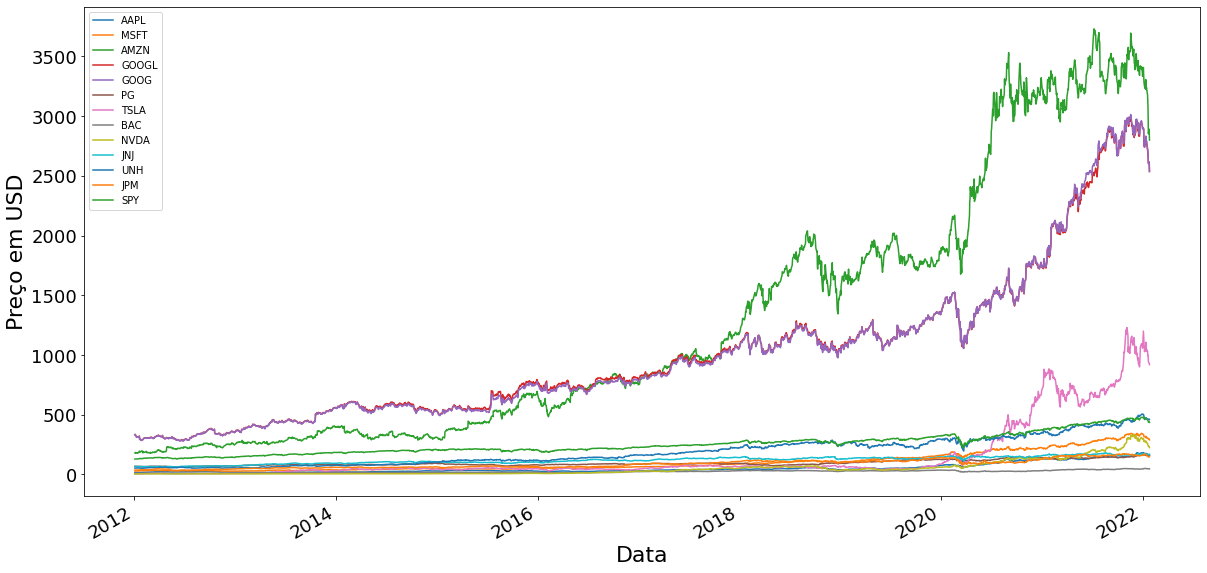

In [23]:
df[['AAPL', 'MSFT', 'AMZN', 'GOOGL', 
         'GOOG', 'PG', 'TSLA', 'BAC', 
         'NVDA', 'JNJ', 'UNH', 'JPM', 'SPY']].plot( figsize=(20,10));
plt.xlabel("Data", fontsize=22)
plt.ylabel("Preço em USD", fontsize=22)
plt.yticks(size=18)
plt.xticks(size=18)
plt.savefig('US-STOCKS.PDF', format='PDF')


#plt.plot(df)

In [11]:
Xtrain = train[x_cols]
Ytrain = train['SPY']
Xtest = test[x_cols]
Ytest = test['SPY']

In [12]:
Ytest.head()

Date
2018-02-06   -0.005440
2018-02-07   -0.038230
2018-02-08    0.014910
2018-02-09    0.014578
2018-02-12    0.002484
Name: SPY, dtype: float64

In [13]:
Xtrain.head()

,AAPL,MSFT,AMZN,GOOGL,GOOG,PG,TSLA,BAC,NVDA,JNJ,UNH,JPM
Date,,,,,,,,,,,,
2012-01-04,0.005360,0.023261,-0.008526,0.004304,0.004304,-0.000449,-0.013264,0.001723,0.011332,-0.006090,0.014461,-0.000858
2012-01-05,0.011041,0.010167,0.000563,-0.013969,-0.013969,-0.004201,-0.021522,0.082555,0.035286,-0.001223,0.006677,0.020672
2012-01-06,0.010400,0.015415,0.027763,-0.013736,-0.013736,-0.002408,-0.007773,-0.020817,-0.011624,-0.008754,0.003606,-0.009009
2012-01-09,-0.001587,-0.013250,-0.022428,-0.043324,-0.043324,0.004211,0.012556,0.014458,0.000000,0.001541,-0.001137,-0.001698
2012-01-10,0.003574,0.003598,0.004359,0.001092,0.001092,-0.004663,0.013487,0.055828,-0.004135,0.004150,-0.001899,0.021024


## Buy & Hold

In [14]:
#std buy-and-hold train and test
Ytrain.std(), Ytest.std()

(0.007692028195000439, 0.01323862118085596)

In [15]:
#SR buy-and-hold train and test
Ytrain.mean()/Ytrain.std(), Ytest.mean()/Ytest.std()

(0.06326366009989662, 0.03621311865338717)

In [16]:
# Total return buy-and-hold train and test
Ytrain.sum(), Ytest.sum()

(0.7455108132416282, 0.47893234786995187)

## Linear Regressor

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, Ytrain)
model.score(Xtrain, Ytrain), model.score(Xtest, Ytest)

(0.006267084783852628, 0.009760076879109514)

In [18]:
# Direction
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
np.mean(np.sign(Ptrain) == np.sign(Ytrain)), np.mean(np.sign(Ptest) == np.sign(Ytest))

(0.5528720626631853, 0.5485485485485485)

In [19]:
set(np.sign(Ptrain)), set(np.sign(Ptest))

({-1.0, 1.0}, {-1.0, 1.0})

In [20]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

train_idx[0] = False
test_idx[-1] = False

In [21]:
df_returns['Position'] = 0 # create new column
df_returns.loc[train_idx,'Position'] = (Ptrain > 0)
df_returns.loc[test_idx,'Position'] = (Ptest > 0)

In [22]:
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['SPY']

In [23]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

0.9840930446548901

In [24]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.7590193192588224

In [25]:

simple1= (np.exp(Ytrain))-1
simple2= (np.exp(Ytest))-1
simple1.sum(), simple2.sum()

(0.7909546580724807, 0.5661764582256384)

In [26]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.006926181705238696, 0.09274350740085686)

In [27]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.01067217355340008, 0.07119253585555861)

In [28]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(5.875811237047622e-05, 0.0001733768047970702)

In [29]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.007665384032811156, 0.013167262615937687)

In [30]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.005450251799644015, 0.008204863853401315)

In [31]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(0.006267084783852628, 0.009760076879109514)

In [32]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(8595542702.889093, 5529372638.32821)

In [33]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.6629769572344901

In [34]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.7103788457736973

In [35]:
df_returns['Position'].to_csv('LinearRegressorBool.csv', index = True)
df_returns['AlgoReturn'].to_csv('LinearRegressorAlgoReturn.csv', index = True)
sum(df_returns['Position'])

2055

## Ridge Regressor

In [36]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(Xtrain, Ytrain)
model.score(Xtrain, Ytrain), model.score(Xtest, Ytest)

(0.0017770166576079882, 0.00584546754597659)

In [37]:
# Direction
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
np.mean(np.sign(Ptrain) == np.sign(Ytrain)), np.mean(np.sign(Ptest) == np.sign(Ytest))

(0.5476501305483029, 0.5645645645645646)

In [38]:
set(np.sign(Ptrain)), set(np.sign(Ptest))

({-1.0, 1.0}, {-1.0, 1.0})

In [39]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

train_idx[0] = False
test_idx[-1] = False

In [40]:
df_returns['Position'] = 0 # create new column
df_returns.loc[train_idx,'Position'] = (Ptrain > 0)
df_returns.loc[test_idx,'Position'] = (Ptest > 0)

In [41]:
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['SPY']

In [42]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

0.7377383250573484

In [43]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.635904325022068

In [44]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.00768978244450525, 0.06262237390651655)

In [45]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.0123272254899105, 0.05163699377519681)

In [46]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(5.902360415752807e-05, 0.00017406219673326716)

In [47]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.007682682094003895, 0.013193263308721885)

In [48]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.005451900051327739, 0.00818197837581859)

In [49]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(0.0017770166576079882, 0.00584546754597659)

In [50]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(9193621211.009024, 4477636672.668833)

In [51]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.6745157135848834

In [52]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.724227405384933

In [53]:
df_returns['Position'].to_csv('RidgeRegressorBool.csv', index = True)
df_returns['AlgoReturn'].to_csv('RidgeRegressorAlgoReturn.csv', index = True)
sum(df_returns['Position'])

2518

## Logistic Regressor

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10)
Ctrain = (Ytrain > 0)
Ctest = (Ytest > 0)
model.fit(Xtrain, Ctrain)
model.score(Xtrain, Ctrain), model.score(Xtest, Ctest)

(0.5469973890339426, 0.5565565565565566)

In [55]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
set(Ptrain), set(Ptest)

({False, True}, {False, True})

In [56]:
df_returns.loc[train_idx,'Position'] = Ptrain
df_returns.loc[test_idx,'Position'] = Ptest
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['SPY']

In [57]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

0.7219760265002408

In [58]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.6847233952902085

In [59]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.0075123765611252785, 0.06273164304732594)

In [60]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.011736583601778407, 0.05839934578495611)

In [61]:
accuracy_score(Ctrain,Ptrain), accuracy_score(Ctest,Ptest)

(0.5469973890339426, 0.5565565565565566)

In [62]:
precision_score(Ctrain,Ptrain), precision_score(Ctest,Ptest)

(0.5495923913043478, 0.5646036916395223)

In [63]:
f1_score(Ctrain,Ptrain), f1_score(Ctest,Ptest)

(0.6998269896193771, 0.701281186783547)

In [64]:
roc_auc_score(Ctrain,Ptrain), roc_auc_score(Ctest,Ptest)

(0.5025013762730526, 0.5038233833074097)

In [65]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.9599523471701682, 0.9207264198036116)

In [66]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.9797715790785974, 0.9595449024426171)

In [67]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.9605936679058937, 0.9222914650082572)

In [68]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(-16233.970899121532, -5257.719932166544)

In [69]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(14698432205075.572, 9016215470796.574)

In [70]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.9886407340713905

In [71]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.9845301121035241

In [72]:
df_returns['Position'].to_csv('LogisticRegressorBool.csv', index = True)
df_returns['AlgoReturn'].to_csv('LogisticRegressorAlgoReturn.csv', index = True)
sum(df_returns['Position'])

2393

## Linear Support Vector Machine using SVC

In [73]:
from sklearn.svm import SVC
model = SVC(C=10)
Ctrain = (Ytrain > 0)
Ctest = (Ytest > 0)
model.fit(Xtrain, Ctrain)
model.score(Xtrain, Ctrain), model.score(Xtest, Ctest)

(0.7604438642297651, 0.5135135135135135)

In [74]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
set(Ptrain), set(Ptest)

({False, True}, {False, True})

In [75]:
df_returns.loc[train_idx,'Position'] = Ptrain
df_returns.loc[test_idx,'Position'] = Ptest
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['SPY']

In [76]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

2.6827373615542047

In [77]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.2815870256701407

In [78]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.0058538826449018545, 0.2991406138858874)

In [79]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.011587887070075693, 0.02432444265810956)

In [80]:
accuracy_score(Ctrain,Ptrain), accuracy_score(Ctest,Ptest)

(0.7604438642297651, 0.5135135135135135)

In [81]:
precision_score(Ctrain,Ptrain), precision_score(Ctest,Ptest)

(0.7237464522232734, 0.5570570570570571)

In [82]:
f1_score(Ctrain,Ptrain), f1_score(Ctest,Ptest)

(0.8065366367949394, 0.6042345276872964)

In [83]:
roc_auc_score(Ctrain,Ptrain), roc_auc_score(Ctest,Ptest)

(0.7443744838976052, 0.49254257025823106)

In [84]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.6865048780643535, 0.6662782443674153)

In [85]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.8285558991790195, 0.8162586871619899)

In [86]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.6899910576615584, 0.6689881911256259)

In [87]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(-11609.354149698269, -3804.4416693844883)

In [88]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(2939686441481.3296, 400.6229288433742)

In [89]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.9891790472422806

In [90]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.9883638882632249

In [91]:
df_returns['Position'].to_csv('SVCBool.csv', index = True)
df_returns['AlgoReturn'].to_csv('SVCAlgoReturn.csv', index = True)
sum(df_returns['Position'])

1723

## Linear Support Vector Machine using LinearSVC

In [92]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=10)
Ctrain = (Ytrain > 0)
Ctest = (Ytest > 0)
model.fit(Xtrain, Ctrain)
model.score(Xtrain, Ctrain), model.score(Xtest, Ctest)

(0.5620104438642297, 0.5475475475475475)

In [93]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
set(Ptrain), set(Ptest)

({False, True}, {False, True})

In [94]:
df_returns.loc[train_idx,'Position'] = Ptrain
df_returns.loc[test_idx,'Position'] = Ptest
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['SPY']

In [95]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

0.8690316850515885

In [96]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.7063371212167056

In [97]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.007262646783517196, 0.07810555504572621)

In [98]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.01143873939988424, 0.06181137104926466)

In [99]:
accuracy_score(Ctrain,Ptrain), accuracy_score(Ctest,Ptest)

(0.5620104438642297, 0.5475475475475475)

In [100]:
precision_score(Ctrain,Ptrain), precision_score(Ctest,Ptest)

(0.5612762871646121, 0.5630733944954128)

In [101]:
f1_score(Ctrain,Ptrain), f1_score(Ctest,Ptest)

(0.6976115367282559, 0.6847977684797769)

In [102]:
roc_auc_score(Ctrain,Ptrain), roc_auc_score(Ctest,Ptest)

(0.5235755573905863, 0.5009059667581456)

In [103]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.8990554076681428, 0.8716341000319869)

In [104]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.9481853234827793, 0.9336134639303286)

In [105]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.9001286498513122, 0.8736187793099421)

In [106]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(-15204.065567283546, -4977.329628438319)

In [107]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(14698432205014.62, 9016215470765.979)

In [108]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.9891164788475748

In [109]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.9852735122511007

In [110]:
df_returns['Position'].to_csv('LinearSVCBool.csv', index = True)
df_returns['AlgoReturn'].to_csv('LinearSVCAlgoReturn.csv', index = True)
sum(df_returns['Position'])

2251

## Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=4)
model.fit(Xtrain, Ctrain)
model.score(Xtrain, Ctrain), model.score(Xtest, Ctest)

(1.0, 0.5075075075075075)

In [112]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [113]:
df_returns.loc[train_idx,'Position'] = Ptrain
df_returns.loc[test_idx,'Position'] = Ptest

In [114]:
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['SPY']

In [115]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

4.57496036184191

In [116]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.20121962344981448

In [117]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.0045681386530458815, 0.6537162686023011)

In [118]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.009643621875961699, 0.02088645190417343)

In [119]:
accuracy_score(Ctrain,Ptrain), accuracy_score(Ctest,Ptest)

(1.0, 0.5075075075075075)

In [120]:
precision_score(Ctrain,Ptrain), precision_score(Ctest,Ptest)

(1.0, 0.5577557755775577)

In [121]:
f1_score(Ctrain,Ptrain), f1_score(Ctest,Ptest)

(1.0, 0.5787671232876712)

In [122]:
roc_auc_score(Ctrain,Ptrain), roc_auc_score(Ctest,Ptest)

(1.0, 0.49407558816583463)

In [123]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.542389704434735, 0.6063790800074961)

In [124]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.7364711158183564, 0.7787034608934881)

In [125]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.5478162462054559, 0.6098853951762092)

In [126]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(-9172.039779984092, -3462.3281785966224)

In [127]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(528.804084883318, 389.1057034172121)

In [128]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.9881180951400796

In [129]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.990195178631987

In [130]:
df_returns['Position'].to_csv('RandomForestBool.csv', index = True)
df_returns['AlgoReturn'].to_csv('RandomForestAlgoReturn.csv', index = True)
sum(df_returns['Position'])

1446

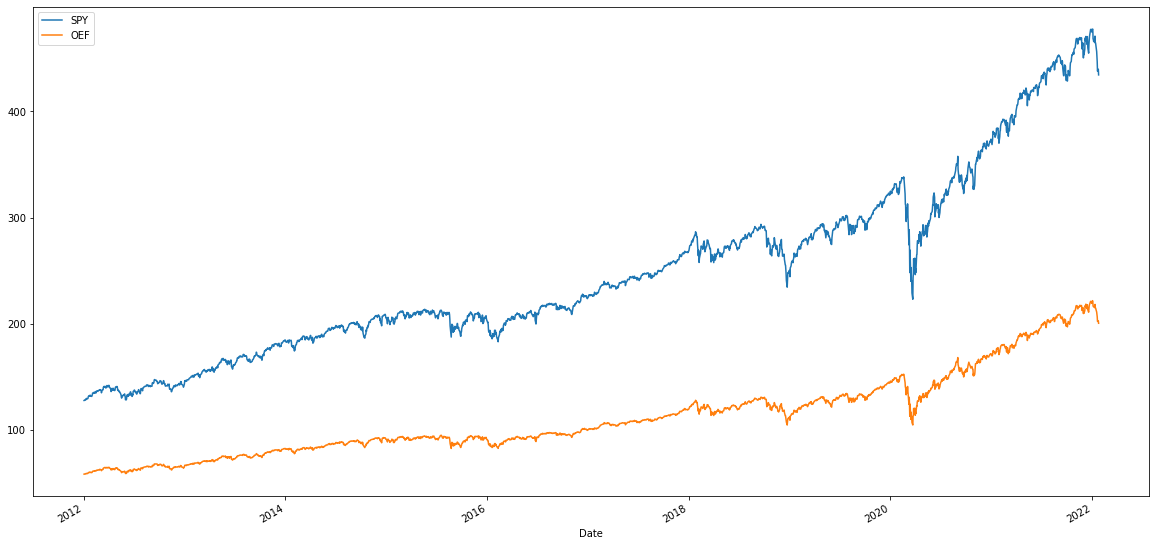

In [131]:
df[['SPY', 'OEF']].plot(figsize=(20,10));